In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import backend as K
from keras.layers import Conv2D
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, img_to_array 
import PIL 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Model, load_model,Sequential, model_from_json
from keras.initializers import glorot_uniform
import cv2
import dlib
from PIL import Image
from skimage import transform
from sklearn.model_selection import train_test_split 
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.regularizers import l2
import json

In [2]:
df = pd.read_csv("train.csv")
datapoints = df['pixels'].tolist()
X_train = []
for x in datapoints:
    X = [int(i) for i in x.split(' ')]
    X = np.asarray(X).reshape(48,48)
    X_train.append(X.astype('float32'))
X_train = np.asarray(X_train)
X_train = np.expand_dims(X_train,-1)
Y_train = pd.get_dummies(df['emotion']).as_matrix()   

C:\Users\omen\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


[0 0 0 0 0 0 1]


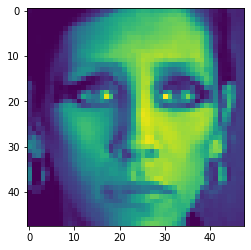

In [3]:
x = X_train[4]
x = x.reshape((48,48))
plt.imshow(x)
# print(emotion[2])
print(Y_train[4])

In [4]:
X_train-=np.mean(X_train,axis=0)
X_train/=np.std(X_train,axis=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1)                           

In [5]:
def model_arch(inp):
    X = Sequential()
    # # X = ZeroPadding2D((3,3))(X_input)
    X.add(Conv2D(64, (3,3), strides = (2,2),input_shape = inp,data_format= 'channels_last'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2)))
    X.add(Dropout(0.2))
    X.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2)))
    X.add(Dropout(0.2))

    X.add(Conv2D(128, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2), padding='same'))
    X.add(Dropout(0.2))
    X.add(Conv2D(128, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2),padding='same'))
    X.add(Dropout(0.2))

    X.add(Conv2D(256, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2), padding = 'same'))
    X.add(Dropout(0.2))
    X.add(Conv2D(256, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2),padding='same'))
    X.add(Dropout(0.2))

    X.add(Conv2D(512, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2), padding = 'same'))
    X.add(Dropout(0.3))
    X.add(Conv2D(512, (3,3), strides = (2,2), padding = 'same'))
    X.add(BatchNormalization())
    X.add(Activation('relu'))
    X.add(MaxPooling2D((2,2), padding = 'same'))
    X.add(Dropout(0.3))

    X.add(Flatten())
    X.add(Dense(512,activation = 'relu'))
    X.add(BatchNormalization())
    X.add(Dropout(0.5))
    # X.add(Dense(1024,activation = 'relu'))
    # X.add(Dropout(0.5))
    X.add(Dense(256,activation = 'relu'))
    X.add(BatchNormalization())
    X.add(Dropout(0.5))
    X.add(Dense(64,activation = 'relu'))
    X.add(BatchNormalization())
    X.add(Dropout(0.5))
    X.add(Dense(7,activation = 'softmax'))

    return X



In [6]:
def model_arch1():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5)) 
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    return model

In [8]:
def get_compiled_model():
    model = model_arch1()
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [9]:
# model = get_compiled_model()
model = load_model('model_early1.h5')
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='model_{epoch}.h5',
        save_best_only=True,
        monitor='val_loss',
        verbose=1),
    keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 7,
                          verbose = 1,
                          mode = 'auto'),
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.9, patience = 3)
]
# print(model)
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//train_generator.batch_size
model.fit(X_train,Y_train,batch_size=64,verbose=1,validation_data=(X_valid,Y_valid),epochs=100,callbacks=callbacks)



Train on 25838 samples, validate on 2871 samples
Epoch 1/100
25838/25838 [==============================] - 72s 3ms/step - loss: 0.7438 - accuracy: 0.7413 - val_loss: 0.5607 - val_accuracy: 0.8070

Epoch 00001: val_loss improved from inf to 0.56072, saving model to model_1.h5
Epoch 2/100
25838/25838 [==============================] - 54s 2ms/step - loss: 0.7295 - accuracy: 0.7457 - val_loss: 0.5939 - val_accuracy: 0.7931

Epoch 00002: val_loss did not improve from 0.56072
Epoch 3/100
25838/25838 [==============================] - 54s 2ms/step - loss: 0.7130 - accuracy: 0.7527 - val_loss: 0.5996 - val_accuracy: 0.7959

Epoch 00003: val_loss did not improve from 0.56072
Epoch 4/100
25838/25838 [==============================] - 55s 2ms/step - loss: 0.6932 - accuracy: 0.7617 - val_loss: 0.5950 - val_accuracy: 0.7837

Epoch 00004: val_loss did not improve from 0.56072
Epoch 5/100
25838/25838 [==============================] - 58s 2ms/step - loss: 0.6774 - accuracy: 0.7664 - val_loss: 0.6

In [14]:
model.save('model_early2.h5')

In [8]:
model = load_model('model_best.h5')

In [9]:
json_string = model.to_json()
# print(json_string)
with open("model_best.json", "w") as json_file:
    json_file.write(json_string)
model.save_weights('model_best_weights.h5')

In [21]:
json_file = open('model_best.json', 'r')
loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
json_file.close()
model.load_weights("model_best_weights.h5")
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")

(134, 87, 3)
C:\Users\omen\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
[0]


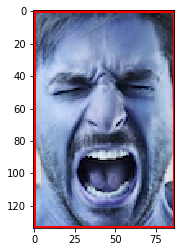

In [23]:
frame = cv2.imread('d1.jpg')
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# print(frame.shape)
(h,w) = frame.shape[:2]  
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300,300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
net.setInput(blob)
detections = net.forward()
# print(detections.shape)
m=0
for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2]
    if confidence < 0.5:
        continue    
    if(m<=confidence):
        confidence = m
        pos = i       
        box = detections[0, 0, pos, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 0, 0), 2)
        cv2.imwrite('3.jpg',frame)
        image = frame[startY:endY, startX:endX]
        # plt.imshow(image)
    
print(image.shape)
plt.imshow(image)
face = cv2.cvtColor(cv2.resize(image,(48,48)), cv2.COLOR_BGR2GRAY)
roi = face.astype("float")
roi-=np.mean(roi,axis=0)
roi/=np.std(roi,axis=0)
roi = np.reshape(roi,(1,48,48,1))
# print(roi.shape)
# image = cv2.reshape(image,(1,48,48,1))    
pred = model.predict(roi)
# print(pred)
c = list(np.argmax(pred,axis=1))
print(c)
# pred = model.predict(image)
# c = list(np.argmax(pred,axis=1))
# print(c)


In [15]:
def get_key(val): 
    d = {0:'Angry', 1: 'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6: 'Neutral'}
    return d[val]

In [16]:
def get_prediction(image,model):
    pred = model.predict(image)
    val = int(np.argmax(pred,axis=1))
    e = get_key(val)
    return e

In [17]:
def realtime():
    cap = cv2.VideoCapture(0)
    net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")
    # count=0
    while True:
        # cap = cv2.VideoCapture(0)
        # net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")
        _, frame = cap.read()
        # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # count+=1
        # print(count)
        # print(type(frame))
        (h,w) = frame.shape[:2]  
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (256,256)), 1.0, (256, 256), (104.0, 117.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        for i in range(0,detections.shape[2]):
            confidence = detections[0,0,i,2]
            if confidence < 0.5:
                continue    
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            image = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(cv2.resize(image,(48,48)), cv2.COLOR_BGR2GRAY)
            roi = face.astype("float") / 255.0
            roi = np.reshape(roi,(1,48,48,1))
            # print(roi.shape)
            emotion = get_prediction(roi,model)
            # print(emotion)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame,(startX,startY),(endX,endY),(255,0,0),2)
            cv2.putText(frame, emotion, (startX,y),cv2.FONT_HERSHEY_COMPLEX,0.45,(255,0,0),2)
            # print(type(image))
        cv2.imshow("Frame" , frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    cv2.destroyAllWindows()   
    cap.release()    



In [20]:
realtime()